## Part 2: Data Preparation and Image Classification Model for Music Mood

This section covers the crucial steps of preparing the image data and training a model for mood classification.  This model will form the core of the application, enabling it to understand user mood from images.

### Assigning Paths for Dataset

We begin by defining the paths to the image datasets used for training and testing.  It's essential to ensure these paths are correctly set relative to the location of your Python script. We also include checks to validate the existence of these directories.


In [15]:
import os
import glob as gb
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [16]:
# Set dataset directories
TRAIN_DIR = "../data/train"  # Update with actual path
TEST_DIR = "../data/test"  # Update with actual path
BATCH_SIZE = 64
IMG_SIZE = 128  # Resize images to 128x128


In [17]:
# Function to View Random Image from Dataset
def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

In [18]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 3995 in folder angry
For training data, found 436 in folder disgust
For training data, found 4097 in folder fear
For training data, found 7215 in folder happy
For training data, found 4965 in folder neutral
For training data, found 4830 in folder sad
For training data, found 3171 in folder surprise


In [20]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 958 in folder angry
For testing data, found 111 in folder disgust
For testing data, found 1024 in folder fear
For testing data, found 1774 in folder happy
For testing data, found 1233 in folder neutral
For testing data, found 1247 in folder sad
For testing data, found 831 in folder surprise


In [21]:
# Class names
class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]


In [22]:
# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize test images

In [24]:
# Load Training and Testing Data
training_set = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [25]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(7, activation='softmax')  # 7 classes for moods
])

c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Train the Model
history = model.fit(
    training_set,
    epochs=130,
    validation_data=test_set
)

c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 1383s 3s/step - accuracy: 0.2390 - loss: 1.8344 - val_accuracy: 0.3487 - val_loss: 1.6596
Epoch 2/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.3323 - loss: 1.6841 - val_accuracy: 0.4303 - val_loss: 1.4748
Epoch 3/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 345s 767ms/step - accuracy: 0.3874 - loss: 1.5568 - val_accuracy: 0.4674 - val_loss: 1.4077
Epoch 4/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 343s 763ms/step - accuracy: 0.4197 - loss: 1.4902 - val_accuracy: 0.4811 - val_loss: 1.3684
Epoch 5/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.4423 - loss: 1.4319 - val_accuracy: 0.4922 - val_loss: 1.3417
Epoch 6/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 435s 966ms/step - accuracy: 0.4568 - loss: 1.4020 - val_accuracy: 0.4935 - val_loss: 1.3268
Epoch 7/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 353s 786ms/step - accuracy: 0.4691 - loss: 1.3829 - val_accuracy: 0.5014 - val_loss: 1.2776
Epoch 8/130
449/449 ━━━━━━━━━━━━━━━━━━━━ 353s 786ms/step - accuracy: 0.4818 -

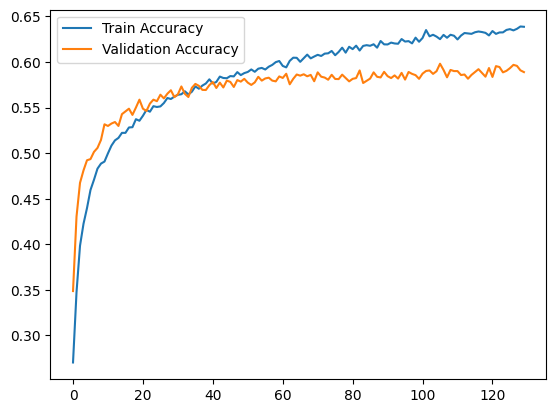

In [29]:

# 4. Evaluate the Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [40]:
# Save Model
model.save("../models/mood_classification_model.h5")

In [32]:
def predict_mood(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    mood = class_names[np.argmax(prediction)]
    return mood


In [39]:
# Example Usage
image_path = "../data/test/neutral/PrivateTest_1960069.jpg"  # Update with actual image path
print("Predicted Mood:", predict_mood(image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Predicted Mood: neutral


In [43]:
# Load the trained model
model_path = r"D:\Hrishi DS\Capstone Project\Mood-for-Music\models\mood_classification_model.h5"
mood_model = tf.keras.models.load_model(model_path)

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test dataset path
TEST_DIR = r"D:\Hrishi DS\Capstone Project\Mood-for-Music\data\test"

# Preprocess test images (rescale pixels)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),  # Match model input size
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    shuffle=False  # Keep order to match labels
)


Found 7178 images belonging to 7 classes.


In [46]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = mood_model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 144s 534ms/step - accuracy: 0.5413 - loss: 1.2549
Test Accuracy: 58.89%
Test Loss: 1.1544


In [47]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_probs = mood_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step
              precision    recall  f1-score   support

       angry       0.47      0.52      0.50       958
     disgust       0.86      0.29      0.43       111
        fear       0.47      0.32      0.38      1024
       happy       0.79      0.81      0.80      1774
     neutral       0.51      0.61      0.55      1233
         sad       0.45      0.44      0.45      1247
    surprise       0.73      0.76      0.75       831

    accuracy                           0.59      7178
   macro avg       0.61      0.54      0.55      7178
weighted avg       0.59      0.59      0.58      7178



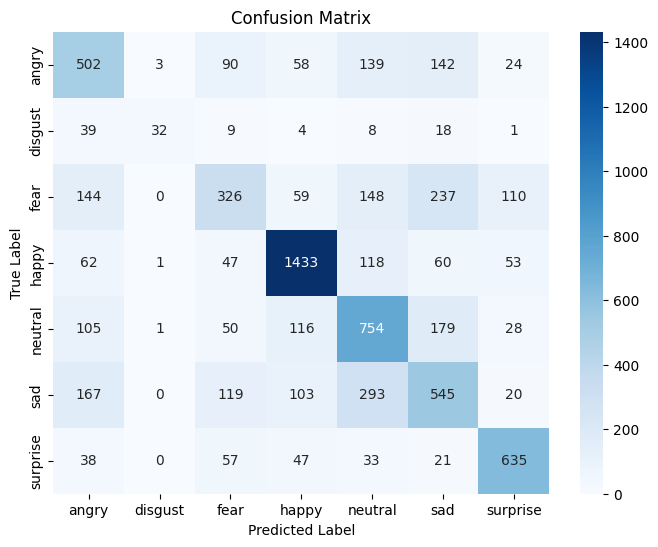

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
